In [1]:
import os

import matplotlib.pyplot as plt
import pandas as pd

plt.style.use("ggplot")

# Improving suspended sediment coefficients in TEOTIL3

## Notebook 05: Check input data

This notebook compares input data from the old version of TEOTIL3 (using area-based coefficients) with input files for the new version (with concentration-based coefficients). The only results to change should be background inputs for SS.

In [2]:
st_yr, end_yr = 2013, 2023
old_in_dir = r"/home/jovyan/shared/common/teotil3/annual_input_data/agri_annual_loss"
new_in_dir = r"/home/jovyan/shared/common/teotil3/annual_input_data/test_new_ss_coeffs/agri_annual_loss"

In [3]:
df_list = []
for year in range(st_yr, end_yr + 1):
    old_df = pd.read_csv(
        os.path.join(old_in_dir, f"teotil3_input_data_nve2024_{year}.csv")
    )
    new_df = pd.read_csv(
        os.path.join(new_in_dir, f"teotil3_input_data_nve2024_{year}.csv")
    )
    old_df["year"] = year
    new_df["year"] = year
    id_cols = ["regine", "year"]
    par_cols = [col for col in old_df.columns if col.endswith("_kg")]
    old_df = old_df[id_cols + par_cols]
    new_df = new_df[id_cols + par_cols]
    df = pd.merge(
        old_df, new_df, how="inner", on=["regine", "year"], suffixes=["_old", "_new"]
    )
    df_list.append(df)

df = pd.concat(df_list, axis="rows")

df.head()

,regine,year,wood_totn_kg_old,wood_din_kg_old,wood_ton_kg_old,wood_totp_kg_old,wood_tdp_kg_old,wood_tpp_kg_old,wood_toc_kg_old,upland_totn_kg_old,...,agriculture_totp_kg_new,agriculture-background_totp_kg_new,agriculture_tdp_kg_new,agriculture-background_tdp_kg_new,agriculture_tpp_kg_new,agriculture-background_tpp_kg_new,agriculture_toc_kg_new,agriculture-background_toc_kg_new,agriculture_ss_kg_new,agriculture-background_ss_kg_new
0,001.10,2013,222.2,36.1,186.2,5.5,0.6,4.8,9938.9,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
1,001.1A1,2013,378.4,61.4,317.0,9.3,1.1,8.2,16986.8,0.8,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
2,001.1A20,2013,79.9,12.9,67.0,2.0,0.2,1.7,3597.8,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
3,001.1A2A,2013,4258.9,681.3,3577.7,105.1,12.1,93.0,192922.6,84.5,...,311.145501,24.232893,64.658906,7.269868,246.486595,16.963025,0.0,22564.325230,150484.069232,11476.838330
4,001.1A2B,2013,8457.0,1318.1,7138.8,210.0,23.9,186.1,384175.8,404.2,...,183.127307,19.123508,48.710352,5.737052,134.416955,13.386455,0.0,18735.804017,80159.171283,9064.660462


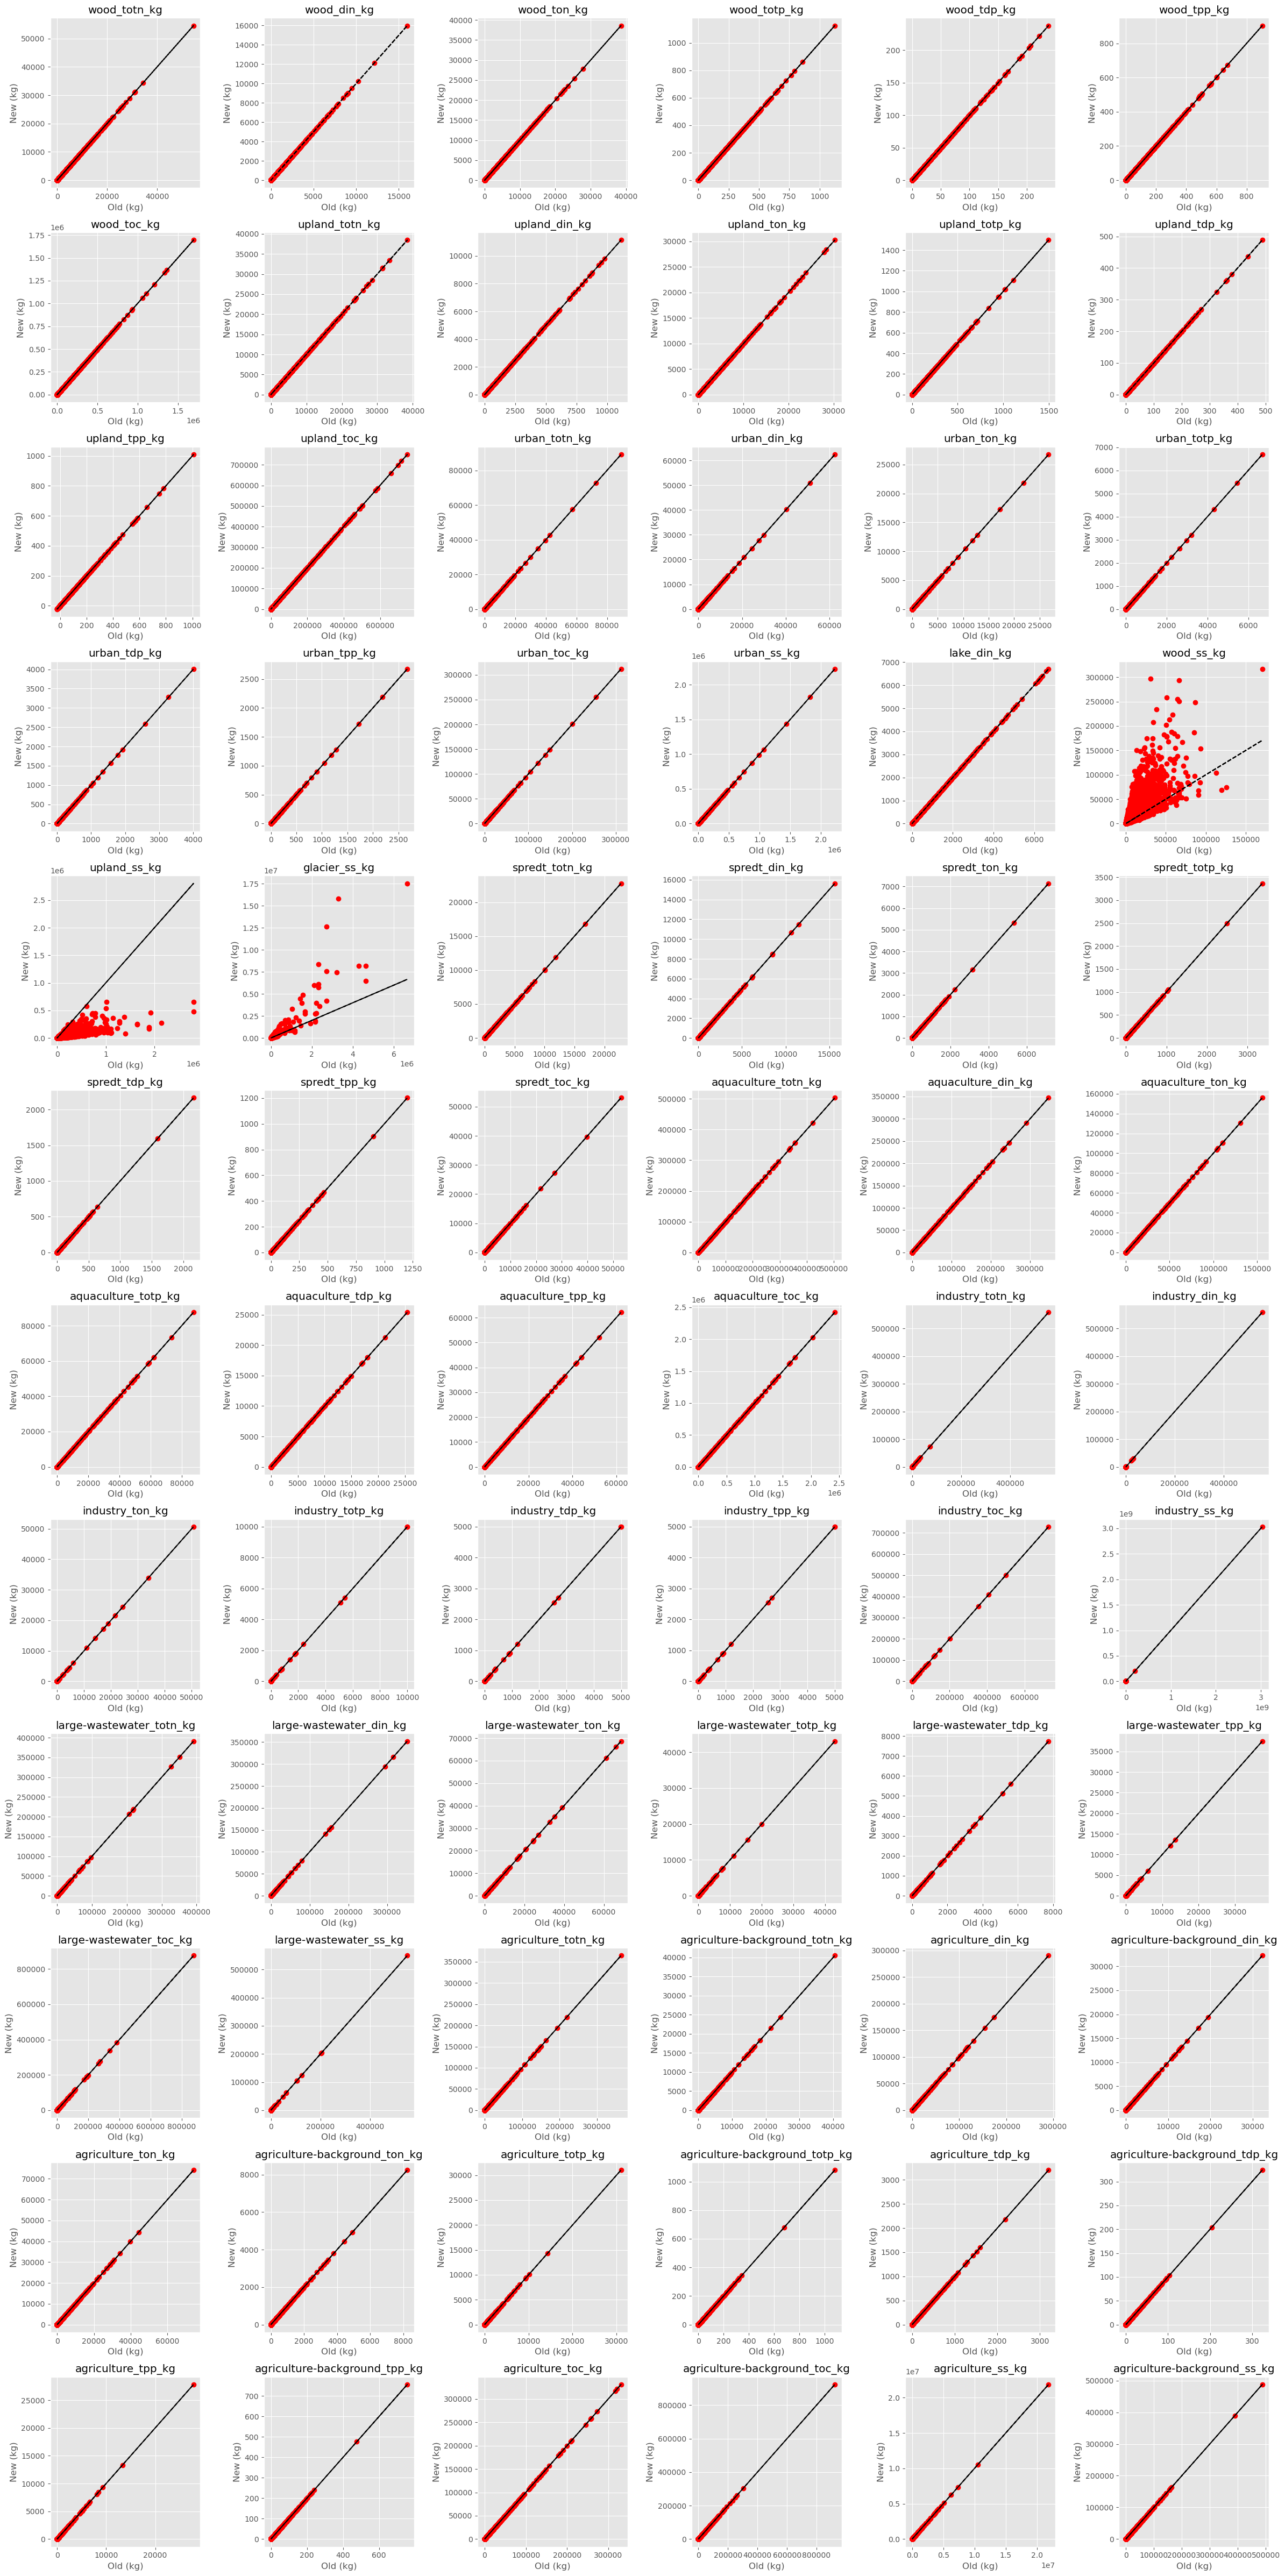

In [4]:
# Sample rows at random to speed plotting
n = 10000
df2 = df.sample(n=n)

fig, axes = plt.subplots(nrows=12, ncols=6, figsize=(24, 48))
axes = axes.flatten()
for idx, par in enumerate(par_cols):
    axes[idx].plot(df2[f"{par}_old"], df2[f"{par}_new"], 'ro')
    axes[idx].plot(df2[f"{par}_old"], df2[f"{par}_old"], 'k--')
    axes[idx].set_title(par)
    axes[idx].set_xlabel('Old (kg)')
    axes[idx].set_ylabel('New (kg)')

plt.tight_layout()

With the new coefficients, losses from forest and glacier areas have generally increased, while those from upland areas have decreased. This is as expected based on the changes made, so I think this is working correctly.